In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date

'2017-08-23'

Date One Year Ago: 2016-08-23 00:00:00


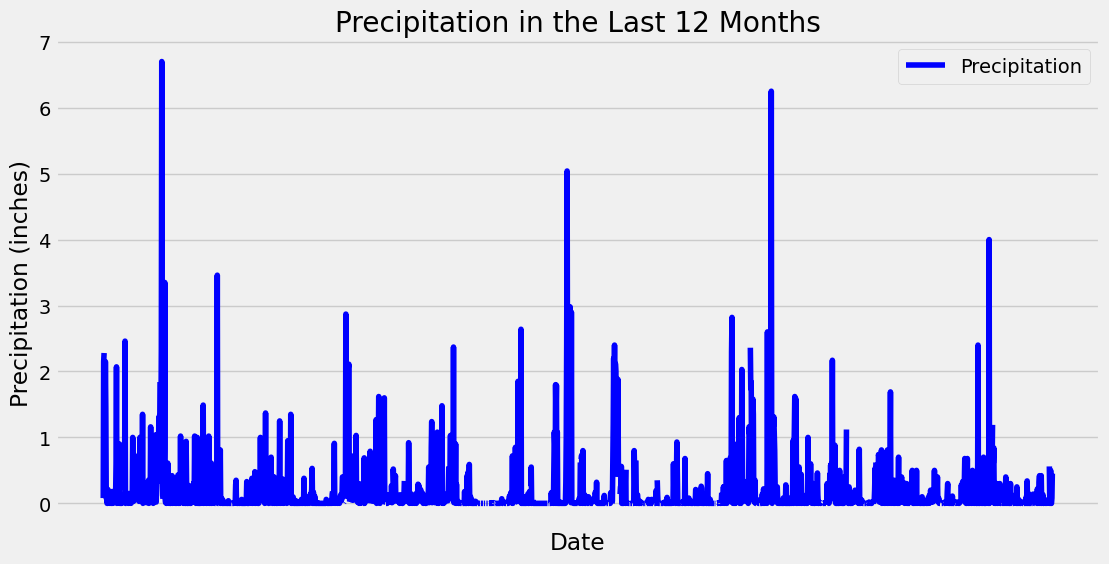

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)
print(f"Date One Year Ago: {one_year_ago}")


# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"])
# Sort the dataframe by date
precip_df["date"] = pd.to_datetime(precip_df["date"])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 6))
plt.plot(precip_df.index, precip_df["precipitation"], label="Precipitation", color="blue")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in the Last 12 Months")
plt.legend()

# Remove x-ticks to reduce clutter
plt.xticks([])

# Show the plot
plt.show()



In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,date,precipitation
count,2223,2015.000000
mean,2017-02-16 18:54:53.927125248,0.176462
min,2016-08-24 00:00:00,0.000000
25%,2016-11-19 00:00:00,0.000000
50%,2017-02-15 00:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.460288


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(Station.id)).all()
station_count

[(9,)]

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
# Convert query results to a Pandas DataFrame
active_stations_df = pd.DataFrame(active_stations, columns=["Station", "Observation Count"])

# List the stations and their counts in descending order.
print(active_stations_df)

       Station  Observation Count
0  USC00519281               2772
1  USC00519397               2724
2  USC00513117               2709
3  USC00519523               2669
4  USC00516128               2612
5  USC00514830               2202
6  USC00511918               1979
7  USC00517948               1372
8  USC00518838                511


In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = (
    session.query(Measurement.station)
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .first()[0]  # Extract the station ID
)

# Display the results
print(f"Most Active Station: {most_active_station}")


Most Active Station: USC00519281


In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Convert string to datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year ago from the most recent date
one_year_ago = most_recent_date - dt.timedelta(days=365)

print(f"Most Recent Date: {most_recent_date}")
print(f"Query Start Date (One Year Ago): {one_year_ago}")


Most Recent Date: 2017-08-23 00:00:00
Query Start Date (One Year Ago): 2016-08-23 00:00:00


# Close Session

In [32]:
# Close Session
session.close()